# Hockey Game Data Analysis

## Introduction
This notebook aims to analyze a hockey game dataset to extract key metrics and insights. We'll be using pandas and numpy to process the data, and matplotlib for visualizations. The analysis will guide you step-by-step through the process of answering specific questions about the game.

### Data Files
- **DA_Tutorial_24.csv**: Contains detailed event data from a hockey game.
- **DA_Tutorial_24_xg.csv**: Contains expected goals (xG) values for shot events.
- **rink_template.png**: A template image of a hockey rink for visualizations.


In [81]:
# Step 2: Loading Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
data_1 = pd.read_csv('DA_Tutorial24_Event_Data.csv')
data_2 = pd.read_csv('DA_Tutorial24_xG_Data.csv')

# Display the first few rows of each dataset to understand their structure
print("DA_Tutorial24_Event_Data.csv")
print(data_1.head)
print("\nDA_Tutorial24_xG_Data.csv")
print(data_2.head)


DA_Tutorial24_Event_Data.csv
<bound method NDFrame.head of       eventname     outcome              type  compiledgametime  \
0          pass  successful             south          0.733333   
1     reception  successful           regular          1.333333   
2          pass  successful  stretchoffboards          2.566667   
3     reception  successful           regular          3.166667   
4          pass  successful            outlet          5.433333   
...         ...         ...               ...               ...   
1792       pass  successful             south       3835.400000   
1793  reception  successful           regular       3836.266600   
1794       pass  successful             north       3837.966600   
1795  reception  successful           regular       3838.733400   
1796       shot  successful           outside       3838.766600   

            playsection zone manpowersituation  goal  teamid  playerid  \
0         southCenterNZ   nz      evenStrength     0     311  

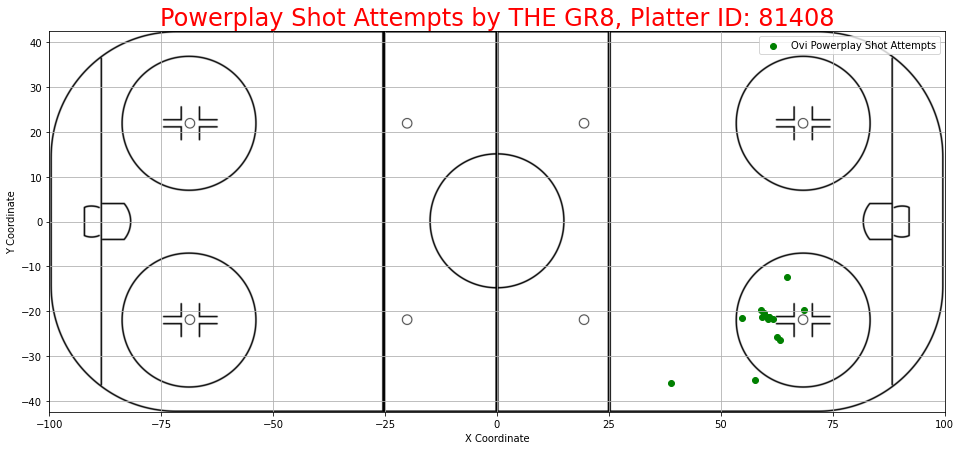

In [82]:
# Assuming player_powerplay_shots is already defined and contains the necessary data
player_powerplay_shots = player_powerplay_shots.copy()

# Flip the Y coordinates
player_powerplay_shots.loc[:, 'yadjcoord'] = player_powerplay_shots['yadjcoord'] * -1

# Create a scatter plot for the player's powerplay shot attempts
# Visualize the shot distribution on the rink
ax = plot_rink(figsize=(20,7))
ax.scatter(player_powerplay_shots['xadjcoord'], player_powerplay_shots['yadjcoord'], label='Ovi Powerplay Shot Attempts', color='green')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Powerplay Shot Attempts by THE GR8, Platter ID: {winning_playerid}', fontsize=24, color='red')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
# Step 3: Data Preprocessing

# Merge the xG data with the main dataset on compiledgametime and playerid
merged_data = pd.merge(data_1, data_2, on=['compiledgametime', 'playerid'], how='left')

# Create new columns for analysis
merged_data['shot_event'] = merged_data['eventname'].str.contains('shot', case=False)
merged_data['successful_shot'] = merged_data.apply(lambda row: row['shot_event'] and row['outcome'] == 'successful', axis=1)
merged_data['goal_event'] = merged_data.apply(lambda row: row['successful_shot'] and row['goal'] == 1, axis=1)
merged_data['pass_event'] = merged_data['eventname'].str.contains('pass', case=False)
merged_data['successful_pass'] = merged_data.apply(lambda row: row['pass_event'] and row['outcome'] == 'successful', axis=1)

# Display the first few rows of the merged dataset
print("Merged Data")
print(merged_data)


Merged Data
      eventname     outcome              type  compiledgametime  \
0          pass  successful             south          0.733333   
1     reception  successful           regular          1.333333   
2          pass  successful  stretchoffboards          2.566667   
3     reception  successful           regular          3.166667   
4          pass  successful            outlet          5.433333   
...         ...         ...               ...               ...   
1792       pass  successful             south       3835.400000   
1793  reception  successful           regular       3836.266600   
1794       pass  successful             north       3837.966600   
1795  reception  successful           regular       3838.733400   
1796       shot  successful           outside       3838.766600   

            playsection zone manpowersituation  goal  teamid  playerid  \
0         southCenterNZ   nz      evenStrength     0     311    111452   
1         centerPointDZ   dz      e

In [87]:
# Step 4: Descriptive Statistics

# Calculate event counts for each type
event_counts = merged_data['eventname'].value_counts()

# Filter for shot events
shot_events = merged_data[merged_data['shot_event']]

# Calculate successful shots and goals
successful_shots = shot_events[shot_events['successful_shot']]
goals = successful_shots[successful_shots['goal'] == 1]

# Calculate successful and unsuccessful passes
pass_events = merged_data[merged_data['pass_event']]
successful_passes = pass_events[pass_events['successful_pass']]

# Analyze events based on the zone of the rink
zone_counts = merged_data['zone'].value_counts()

# Breakdown of events by game time
merged_data['period'] = np.where(merged_data['compiledgametime'] <= 1200, 1, 
                                 np.where(merged_data['compiledgametime'] <= 2400, 2, 
                                          np.where(merged_data['compiledgametime'] <= 3600, 3, 4)))

period_counts = merged_data['period'].value_counts()

# Display the calculated metrics
print("Event Counts")
print(event_counts)
print("\nSuccessful Shots: ", successful_shots.shape[0])
print("Goals: ", goals.shape[0])
print("\nPasses")
print("Successful Passes: ", successful_passes.shape[0])
print("Unsuccessful Passes: ", pass_events.shape[0] - successful_passes.shape[0])
print("\nZone Counts")
print(zone_counts)
print("\nPeriod Counts")
print(period_counts)


Event Counts
pass         945
reception    729
shot         123
Name: eventname, dtype: int64

Successful Shots:  59
Goals:  7

Passes
Successful Passes:  714
Unsuccessful Passes:  231

Zone Counts
oz    930
dz    614
nz    253
Name: zone, dtype: int64

Period Counts
1    585
2    572
3    512
4    128
Name: period, dtype: int64


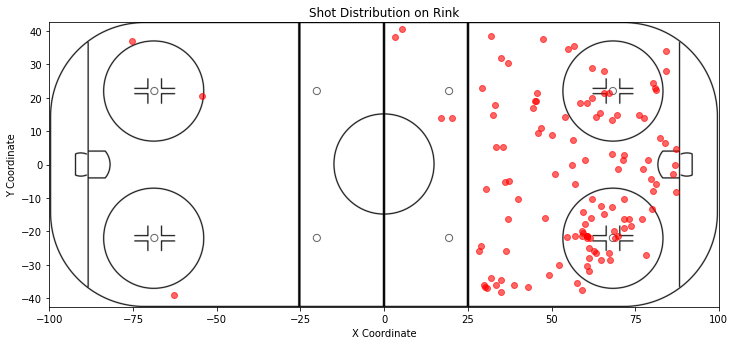

In [88]:
# Step 5: Exploratory Data Analysis (EDA)

# Plot the rink template
def plot_rink(figsize=(12, 7)):
    rink_img = plt.imread('rink_template.png')
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(rink_img, extent=[-100, 100, -42.5, 42.5])
    return ax


# Visualize the shot distribution on the rink
ax = plot_rink()
ax.scatter(shot_events['xadjcoord'], shot_events['yadjcoord'], c='red', alpha=0.6)
plt.title('Shot Distribution on Rink')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


## Q1) 
### a) Which teamid won the game?
### b) How many goals did the winning team score? 
### c) Which period was the winning goal scored in?


In [89]:
#Sort goals by team id
#Sort goals by period 

# Sort goals by team ID
goals_sorted_by_team = goals.sort_values(by='teamid')

# Sort goals by period
goals_sorted_by_period = goals.sort_values(by='period')

# Calculate the score for each team
team_scores = goals['teamid'].value_counts()

# Determine the winning team
winning_team = team_scores.idxmax()
winning_team_total_score = team_scores.max()
losing_team_total_score = team_scores.array[1]

# Find the period of the winning goal
# Assumes the last goal scored by the winning team is the winning goal in a close game
winning_goal = goals[goals['teamid'] == winning_team].iloc[-1]
winning_goal_period = winning_goal['period']

# Display the sorted goals and the results
print("Goals Sorted by Team ID")
print(goals_sorted_by_team)

print("Goals Sorted by Period")
print(goals_sorted_by_period)

from IPython.display import display, Markdown


display(Markdown(f'<span style="font-size: 20px;">**Winning Team ID:** <span style="color: red;">{winning_team}</span></span>'))
display(Markdown(f'<span style="font-size: 20px;">**Winning Team Score:** <span style="color: red;">{winning_team_total_score}</span></span>'))
display(Markdown(f'<span style="font-size: 20px;">**Losing Team Score:** <span style="color: red;">{losing_team_total_score}</span></span>'))
display(Markdown(f'<span style="font-size: 20px;">**Period of Winning Goal:** <span style="color: red;">{winning_goal_period}</span></span>'))


Goals Sorted by Team ID
     eventname     outcome     type  compiledgametime       playsection zone  \
20        shot  successful  outside         38.633335  outsideNorthWest   oz   
1132      shot  successful     slot       2365.633300         innerSlot   oz   
1203      shot  successful     slot       2504.266600     westOuterSlot   oz   
309       shot  successful     slot        645.066650     eastOuterSlot   oz   
805       shot  successful  outside       1676.600000       centerPoint   oz   
1271      shot  successful  outside       2648.433300  outsideNorthWest   oz   
1796      shot  successful  outside       3838.766600  outsideNorthWest   oz   

     manpowersituation  goal  teamid  playerid  opposingteamgoalieoniceid  \
20        evenStrength     1     311    109964                      80264   
1132      evenStrength     1     311    370192                      80264   
1203         powerPlay     1     311    370192                      80264   
309       evenStrength     

<span style="font-size: 20px;">**Winning Team ID:** <span style="color: red;">315</span></span>

<span style="font-size: 20px;">**Winning Team Score:** <span style="color: red;">4</span></span>

<span style="font-size: 20px;">**Losing Team Score:** <span style="color: red;">3</span></span>

<span style="font-size: 20px;">**Period of Winning Goal:** <span style="color: red;">4</span></span>

## Q1)
### d) Limited to the period answered in c), how many shot attempts did the winning team have that were blocked?

In [90]:
# Filter for the winning team's shot attempts in the period of the winning goal that were blocked
blocked_shots = merged_data[(merged_data['teamid'] == winning_team) & 
                            (merged_data['eventname'] == 'shot') &
                            (merged_data['outcome'] == 'failed') & 
                            (merged_data['type'].str.contains('block', case=False, na=False)) & 
                            (merged_data['period'] == winning_goal_period)]

# Count the number of blocked shot attempts
num_blocked_shots = blocked_shots.shape[0]

# Display result
display(Markdown(f'<span style="font-size: 20px;">**Number of Blocked Shots in Period {winning_goal_period}:** <span style="color: red;">{num_blocked_shots}</span></span>'))


<span style="font-size: 20px;">**Number of Blocked Shots in Period 4:** <span style="color: red;">3</span></span>

## Sanity check on blocked shots from winning team in OT

In [91]:
# Filter for all shot attempts by the winning team in the winning goal period (Period 4)
shots_in_period = merged_data[(merged_data['teamid'] == winning_team) & 
                              (merged_data['eventname'] == 'shot') & 
                              (merged_data['period'] == winning_goal_period)]

# Print all shots with their types for sanity check
print("All Shots from Winning Team in Period", winning_goal_period)
print(shots_in_period[['compiledgametime', 'playerid', 'outcome', 'type']])

# Filter for blocked shots (those that contain 'block' in their type)
blocked_shots = shots_in_period[(shots_in_period['outcome'] == 'failed') & 
                                (shots_in_period['type'].str.contains('block', case=False, na=False))]

# Print blocked shots for sanity check
print("\nBlocked Shots from Winning Team in Period", winning_goal_period)
print(blocked_shots[['compiledgametime', 'playerid', 'outcome', 'type']])

# Count the number of blocked shot attempts
num_blocked_shots = blocked_shots.shape[0]

# Display the count of blocked shots
print(f"\nNumber of Blocked Shots in Period {winning_goal_period}: {num_blocked_shots}")


All Shots from Winning Team in Period 4
      compiledgametime  playerid     outcome            type
1681         3631.8000     81408      failed            slot
1690         3652.0667     81408  successful            slot
1709         3675.7666     78625  successful            slot
1714         3682.3333     78625  successful            slot
1725         3698.1000     81408  successful            slot
1730         3705.8000     79380  successful         outside
1751         3742.1000     81408      failed  outsideblocked
1781         3821.4333     81408      failed     slotblocked
1788         3829.3000     81408      failed     slotblocked
1796         3838.7666     81408  successful         outside

Blocked Shots from Winning Team in Period 4
      compiledgametime  playerid outcome            type
1751         3742.1000     81408  failed  outsideblocked
1781         3821.4333     81408  failed     slotblocked
1788         3829.3000     81408  failed     slotblocked

Number of Block

## Q1)
### e) Create a scatter plot for all of the winning team's shot attempts limited to the period answered in c) and highlight the winning goal in a different colour.

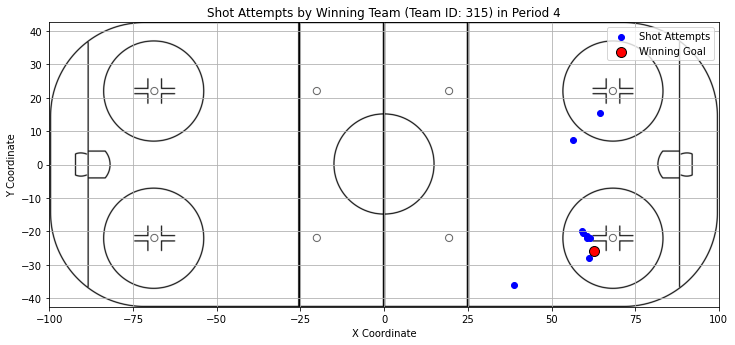

Filtered Data for Winning Team's Shot Attempts in the Winning Goal Period
     eventname     outcome            type  compiledgametime  \
1681      shot      failed            slot         3631.8000   
1690      shot  successful            slot         3652.0667   
1709      shot  successful            slot         3675.7666   
1714      shot  successful            slot         3682.3333   
1725      shot  successful            slot         3698.1000   
1730      shot  successful         outside         3705.8000   
1751      shot      failed  outsideblocked         3742.1000   
1781      shot      failed     slotblocked         3821.4333   
1788      shot      failed     slotblocked         3829.3000   
1796      shot  successful         outside         3838.7666   

           playsection zone manpowersituation  goal  teamid  playerid  \
1681     westOuterSlot   oz         powerPlay     0     315     81408   
1690     eastOuterSlot   oz         powerPlay     0     315     81408   
17

In [92]:
# Plot the rink template
def plot_rink():
    rink_img = plt.imread('rink_template.png')
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.imshow(rink_img, extent=[-100, 100, -42.5, 42.5])
    return ax


# Determine the winning team and period of the winning goal (from previous steps)
winning_team = team_scores.idxmax()
winning_goal_period = winning_goal['period']

# Filter for the winning team's shot attempts in the period of the winning goal
winning_team_shots = merged_data[(merged_data['teamid'] == winning_team) & 
                                 (merged_data['shot_event']) & 
                                 (merged_data['period'] == winning_goal_period)]

# Identify the winning goal event
winning_goal_event = winning_team_shots[winning_team_shots['goal_event']].iloc[0]

# Create a scatter plot for the winning team's shot attempts in the winning goal period
# Visualize the shot distribution on the rink
ax = plot_rink()
ax.scatter(winning_team_shots['xadjcoord'], winning_team_shots['yadjcoord'], label='Shot Attempts', color='blue')
ax.scatter(winning_goal_event['xadjcoord'], winning_goal_event['yadjcoord'], label='Winning Goal', color='red', edgecolors='black', s=100)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Shot Attempts by Winning Team (Team ID: {winning_team}) in Period {winning_goal_period}')
plt.legend()
plt.grid(True)
plt.show()

print("Filtered Data for Winning Team's Shot Attempts in the Winning Goal Period")
print(winning_team_shots)


## Q2)

### a) Which playerid scored the winning goal? 

In [93]:
# Locate the row with the winning goal
winning_goal_row = merged_data.loc[1796]

# Print the row
print("Winning Goal Row:")
print(winning_goal_row)

# Extract the playerid who scored the winning goal
winning_playerid = winning_goal_row['playerid']
display(Markdown(f'<span style="font-size: 20px;">**Player ID who scored the winning goal:** <span style="color: red;">{winning_playerid}</span></span>'))

Winning Goal Row:
eventname                                shot
outcome                            successful
type                                  outside
compiledgametime                    3838.7666
playsection                  outsideNorthWest
zone                                       oz
manpowersituation                   powerPlay
goal                                        1
teamid                                    315
playerid                                81408
opposingteamgoalieoniceid                5152
xadjcoord                           62.562599
yadjcoord                               -25.9
xg                                    0.05091
shot_event                               True
successful_shot                          True
goal_event                               True
pass_event                              False
successful_pass                         False
period                                      4
Name: 1796, dtype: object


<span style="font-size: 20px;">**Player ID who scored the winning goal:** <span style="color: red;">81408</span></span>

## Q2)
### b) How many shot attempts did this player have on the powerplay for the full game? 
### c) Create a scatter plot for all of this player's powerplay shot attempts for the full game.

Number of Powerplay Shot Attempts by Player 81408: 15


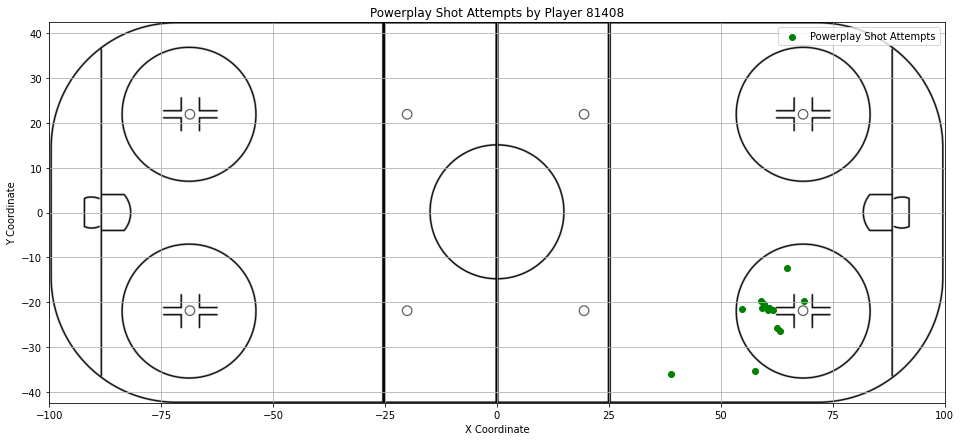

In [104]:
# Plot the rink template
def plot_rink(figsize=(12, 7)):
    rink_img = plt.imread('rink_template.png')
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(rink_img, extent=[-100, 100, -42.5, 42.5])
    return ax



# Filter for the player's powerplay shot attempts
player_powerplay_shots = merged_data[(merged_data['playerid'] == winning_playerid) & 
                                     (merged_data['shot_event']) & 
                                     (merged_data['manpowersituation'] == 'powerPlay')]

# Count the number of powerplay shot attempts
num_powerplay_shots = player_powerplay_shots.shape[0]

# Display the count of powerplay shot attempts
print(f"Number of Powerplay Shot Attempts by Player {winning_playerid}: {num_powerplay_shots}")

# Create a scatter plot for the player's powerplay shot attempts
# Visualize the shot distribution on the rink
ax = plot_rink(figsize=(20, 7))
ax.scatter(player_powerplay_shots['xadjcoord'], player_powerplay_shots['yadjcoord'], label='Powerplay Shot Attempts', color='green')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Powerplay Shot Attempts by Player {winning_playerid}')
plt.legend()
plt.grid(True)
plt.show()

## Q2)
### d) If we told you these were Alex Ovechkin's powerplay shot attempts, what would you need to do to the Y coordinates for these attempts to appear from "Ovi's Office"? 
### e) Please re-create the scatter plot accordingly.

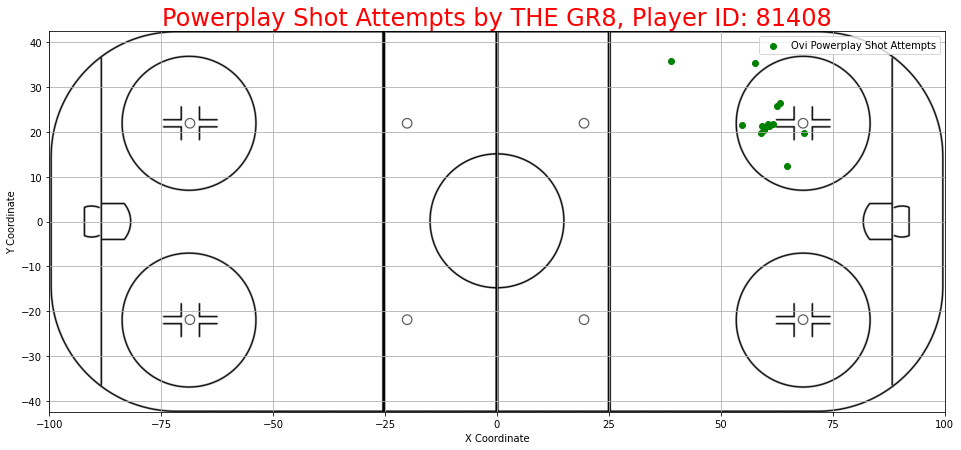

In [105]:
# Assuming player_powerplay_shots is already defined and contains the necessary data
player_powerplay_shots = player_powerplay_shots.copy()

# Flip the Y coordinates
player_powerplay_shots.loc[:, 'yadjcoord'] = player_powerplay_shots['yadjcoord'] * -1

# Create a scatter plot for the player's powerplay shot attempts
# Visualize the shot distribution on the rink
ax = plot_rink(figsize=(20,7))
ax.scatter(player_powerplay_shots['xadjcoord'], player_powerplay_shots['yadjcoord'], label='Ovi Powerplay Shot Attempts', color='green')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Powerplay Shot Attempts by THE GR8, Player ID: {winning_playerid}', fontsize=24, color='red')
plt.legend()
plt.grid(True)
plt.show()


## Q3)
### a) Build a visual to display the following information for the Assistant Coach in a clear and digestible way: What was the even strength pass completion rate for each team broken down by zone? (please use the zone of pass origin)
### b) From this visual, what was teamid 315's even strength pass completion rate in the offensive zone?
### c) Which zone was most challenging to complete passes in at even strength? 

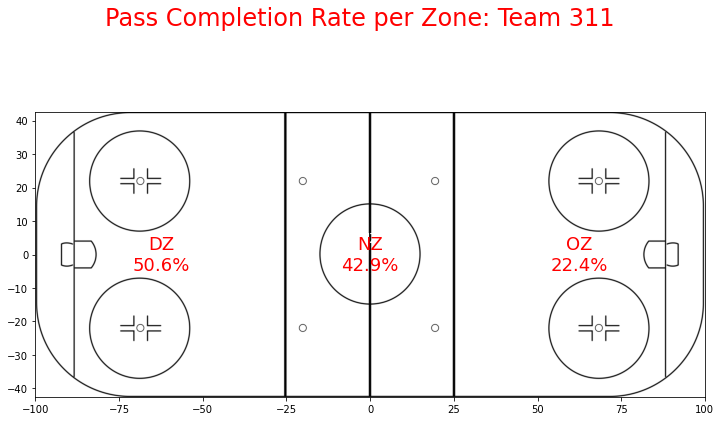

OZ was hardest to complete passes in. Likely because there is the most on puck pressure. 
 Teams will back off, or track back in defensive posture allowing for a team in the DZ with possesion to more easily complete a pass.


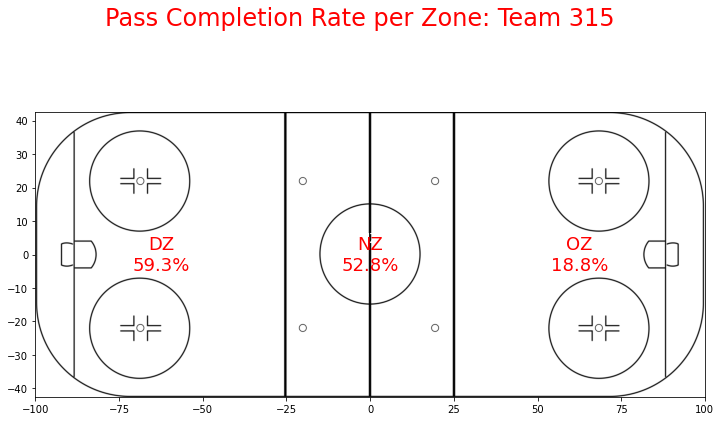

OZ was hardest to complete passes in. Likely because there is the most on puck pressure. 
 Teams will back off, or track back in defensive posture allowing for a team in the DZ with possesion to more easily complete a pass.


In [107]:
# Filter for even-strength pass events and calculate completion rates by zone
even_strength_passes = merged_data[(merged_data['eventname'] == 'pass') & 
                                   (merged_data['outcome'] == 'successful') & 
                                   (merged_data['manpowersituation'] == 'evenStrength')]

# Calculate pass completion rates by zone for each team
zones = ['oz', 'nz', 'dz']
team_zone_pass_rates = even_strength_passes.groupby(['teamid', 'zone']).size().unstack(fill_value=0)
total_passes_by_zone = merged_data[merged_data['eventname'] == 'pass'].groupby(['teamid', 'zone']).size().unstack(fill_value=0)
pass_completion_rates = (team_zone_pass_rates / total_passes_by_zone).fillna(0)

# Define the center positions for the zones on the X axis
zone_positions = {'dz': -62.5, 'nz': 0, 'oz': 62.5}

# Create a figure for each team
for team in pass_completion_rates.index:
    # Add rink visual
    ax = plot_rink(figsize=(12, 7))

    # Annotate the pass completion rates and zone labels
    for zone in zones:
        if zone in pass_completion_rates.columns:
            rate = pass_completion_rates.loc[team, zone]
            zone_label = zone.upper()
            ax.text(zone_positions[zone], 5, f"{zone_label}", ha='center', va='center', fontsize=14, color='white')
            ax.text(zone_positions[zone], 0, f"{zone_label}\n{rate:.1%}", ha='center', va='center', fontsize=18, color='red')

    # Add the title and descriptive data above the figure
    plt.suptitle(f"Pass Completion Rate per Zone: Team {team}\n", fontsize=24, color='red') 
    plt.subplots_adjust(top=0.85)

    plt.title(f"\nTeam \nOZ successful passes {pass_completion_rates.loc[team, 'oz']:.1%}\n"
              f"NZ successful passes {pass_completion_rates.loc[team, 'nz']:.1%}\n"
              f"DZ successful passes {pass_completion_rates.loc[team, 'dz']:.1%}", fontsize=16, color='white')

    plt.show()
    
    print("OZ was hardest to complete passes in. Likely because there is the most on puck pressure. \n Teams will back off, or track back in defensive posture allowing for a team in the DZ with possesion to more easily complete a pass.")


## Q3)
### d) What was teamid 311's all strengths slot save percentage? (The slot includes innerSlot, westOuterSlot, & eastOuterSlot. Please format this answer as X.XXX)

In [108]:
# Filter for shots in specified playsections
slot_shots = merged_data[(merged_data['eventname'] == 'shot') & 
                         (merged_data['playsection'].isin(['innerSlot', 'westOuterSlot', 'eastOuterSlot']))]

# Group by opposingteamgoalieoniceid and teamid
grouped_slot_shots = slot_shots.groupby(['opposingteamgoalieoniceid', 'teamid'])

# Count occurrences where goal = 1 for each goalie
slot_goals_per_goalie = grouped_slot_shots['goal'].sum()

# Count total occurrences for each goalie
total_slot_shots_by_goalie = grouped_slot_shots.size()

# Calculate save percentage
slot_save_percentage_by_goalie = 1 - (slot_goals_per_goalie / total_slot_shots_by_goalie)

# Display the results
for (goalie_id, team_id) in slot_save_percentage_by_goalie.index:
    print(f"Goalie ID: {goalie_id}")
    print(f"Slot Save Percentage: {slot_save_percentage_by_goalie[goalie_id, team_id]:.2%}")
    print(f"Team ID: {team_id}")
    print(f"Total Slot Shots: {total_slot_shots_by_goalie[goalie_id, team_id]}")
    print(f"Slot Goals: {slot_goals_per_goalie[goalie_id, team_id]}\n")


Goalie ID: 5152
Slot Save Percentage: 96.43%
Team ID: 315
Total Slot Shots: 28
Slot Goals: 1

Goalie ID: 80264
Slot Save Percentage: 92.59%
Team ID: 311
Total Slot Shots: 27
Slot Goals: 2



## Q4)
### a) Assuming the centre of the net is at X=89 (goal line), Y=0 (centre ice), what was the all strengths average shot distance to the centre of the net for teamid 315's shots on goal from the outside north west playsection?

In [109]:
import numpy as np

# Filter for shots in the outsideNorthWest playsection
outside_northwest_shots = merged_data[(merged_data['eventname'] == 'shot') & 
                                      (merged_data['playsection'] == 'outsideNorthWest')].copy()

# Split the data by teamid
grouped_by_team = outside_northwest_shots.groupby('teamid')

# Calculate the distance from each shot's coordinates to the center of the net (89, 0)
def calculate_distance(row):
    x = row['xadjcoord']
    y = row['yadjcoord']
    return np.sqrt((x - 89)**2 + y**2)

outside_northwest_shots.loc[:, 'distance_to_net'] = outside_northwest_shots.apply(calculate_distance, axis=1)

# Compute the average distance for each team
average_distance_by_team = grouped_by_team['distance_to_net'].mean()

# Display the results
for team_id in average_distance_by_team.index:
    print(f"Team ID: {team_id}")
    print(f"Average Outside North West Shot Distance from Net: {average_distance_by_team[team_id]:.2f} feet\n")


Team ID: 311
Average Outside North West Shot Distance from Net: 32.74 feet

Team ID: 315
Average Outside North West Shot Distance from Net: 35.57 feet



## Q4)
### b) What was teamid 315's all strengths Goals Saved Above Expected from the outside north west playsection? (please format as X.XX) 

In [110]:
# Filter for shots in the outsideNorthWest playsection
outside_northwest_shots = merged_data[(merged_data['eventname'] == 'shot') & 
                                      (merged_data['playsection'] == 'outsideNorthWest')]

# Group by opposingteamgoalieoniceid and teamid
grouped_outside_northwest_shots = outside_northwest_shots.groupby(['opposingteamgoalieoniceid', 'teamid'])

# Calculate average xG for all shots per goalie
average_xg_per_goalie = grouped_outside_northwest_shots['xg'].mean()

# Calculate total number of goals conceded by each goalie from outside north west playsection
goals_conceded_per_goalie = grouped_outside_northwest_shots['goal'].sum()

# Count total occurrences for each goalie
total_outside_northwest_shots_by_goalie = grouped_outside_northwest_shots.size()

# Calculate save percentage
outside_northwest_save_percentage_by_goalie = 1 - (goals_conceded_per_goalie / total_outside_northwest_shots_by_goalie)

# Calculate expected goals allowed (total xG for all shots faced by the goalie)
expected_goals_allowed_per_goalie = average_xg_per_goalie * total_outside_northwest_shots_by_goalie

# Calculate Goals Saved Above Expected (GSAx)
goals_saved_above_expected_per_goalie = expected_goals_allowed_per_goalie - goals_conceded_per_goalie

# Display the results
for (goalie_id, team_id) in goals_saved_above_expected_per_goalie.index:
    print(f"Goalie ID: {goalie_id}")
    print(f"Team ID: {team_id}")
    print(f"Average xG: {average_xg_per_goalie[goalie_id, team_id] * 100:.2f}%")
    print(f"Actual Save Percentage: {outside_northwest_save_percentage_by_goalie[goalie_id, team_id] * 100:.2f}%")
    print(f"Total Shots from Outside Northwest: {total_outside_northwest_shots_by_goalie[goalie_id, team_id]}")
    print(f"Goals Conceded: {goals_conceded_per_goalie[goalie_id, team_id]}")
    print(f"Expected Goals Allowed: {expected_goals_allowed_per_goalie[goalie_id, team_id]:.2f}")
    print(f"Goals Saved Above Expected (GSAx): {goals_saved_above_expected_per_goalie[goalie_id, team_id]:.2f}\n")


Goalie ID: 5152
Team ID: 315
Average xG: 7.78%
Actual Save Percentage: 71.43%
Total Shots from Outside Northwest: 7
Goals Conceded: 2
Expected Goals Allowed: 0.54
Goals Saved Above Expected (GSAx): -1.46

Goalie ID: 80264
Team ID: 311
Average xG: 4.62%
Actual Save Percentage: 87.50%
Total Shots from Outside Northwest: 8
Goals Conceded: 1
Expected Goals Allowed: 0.37
Goals Saved Above Expected (GSAx): -0.63



## Q5)
### a) If a "Shot Assist" is defined as a sequence of events where there is: 1) a successful pass followed by 2) a successful reception by a *teammate* and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. How many shot attempts did playerid 79380 have that were assisted?

In [117]:
import pandas as pd
from IPython.display import display, Markdown

# Assuming merged_data is your DataFrame

# Sort the data by compiledgametime
merged_data = merged_data.sort_values(by='compiledgametime')

# Create a column to flag shots with assists
merged_data['shot_assist'] = False

# Iterate through the DataFrame to flag shot assists
for i in range(2, len(merged_data)):
    # Check if current row is a shot event and the shooter is the same as the receiver
    if (
        merged_data.iloc[i]['eventname'] == 'shot'
        and merged_data.iloc[i]['outcome'] == 'successful'
        and merged_data.iloc[i]['playerid'] == merged_data.iloc[i - 1]['playerid']  # Ensure shooter is the same as receiver
    ):
        # Check if the previous row is a successful reception by the shooter
        if (
            merged_data.iloc[i - 1]['eventname'] == 'reception'
            and merged_data.iloc[i - 1]['outcome'] == 'successful'
        ):
            # Check if the row before the reception is a successful pass by a teammate
            if (
                merged_data.iloc[i - 2]['eventname'] == 'pass'
                and merged_data.iloc[i - 2]['outcome'] == 'successful'
                and merged_data.iloc[i]['teamid'] == merged_data.iloc[i - 1]['teamid'] == merged_data.iloc[i - 2]['teamid']
            ):
                # Flag the shot event as a shot with an assist
                merged_data.at[merged_data.index[i], 'shot_assist'] = True

# Filter for shots with assists for playerid 79380
shots_with_assist = merged_data[(merged_data['playerid'] == 79380) & (merged_data['shot_assist'])]

# Count the number of assisted shot attempts for playerid 79380
num_shots_with_assist = shots_with_assist.shape[0]

display(
    Markdown(
        f'<span style="font-size: 20px;">**Number of shot attempts with assists for playerid 79380:** <span style="color: red;">{num_shots_with_assist}</span></span>'
    )
)

# Display the first few rows of the DataFrame with the new column
print(merged_data.head())

# Perform a sanity check: list all shot assists sorted by player ID
assisted_shots_list = merged_data[merged_data['shot_assist']][['playerid', 'compiledgametime', 'outcome', 'eventname', 'type']]
assisted_shots_list = assisted_shots_list.sort_values(by=['playerid', 'compiledgametime'])

# Display the sorted list of shot assists
print("Shot Assists Sorted by Player ID")
print(assisted_shots_list)


<span style="font-size: 20px;">**Number of shot attempts with assists for playerid 79380:** <span style="color: red;">5</span></span>

   eventname     outcome              type  compiledgametime  \
0       pass  successful             south          0.733333   
1  reception  successful           regular          1.333333   
2       pass  successful  stretchoffboards          2.566667   
3  reception  successful           regular          3.166667   
4       pass  successful            outlet          5.433333   

         playsection zone manpowersituation  goal  teamid  playerid  ...  \
0      southCenterNZ   nz      evenStrength     0     311    111452  ...   
1      centerPointDZ   dz      evenStrength     0     311        80  ...   
2        westPointDZ   dz      evenStrength     0     311        80  ...   
3  northEastBoardsNZ   nz      evenStrength     0     311    111452  ...   
4        innerSlotDZ   dz      evenStrength     0     315     80264  ...   

   xadjcoord  yadjcoord  xg  shot_event  successful_shot  goal_event  \
0  -2.316772   9.808823 NaN       False            False       False   
1 -26.457947  

## Q5)
### b) Assume the full xG value from the shot attempt can be credited to the passer for their shot assist, which *passer id* created the most xG via shot assists for their teammates?

In [119]:
# merged_data has the 'shot_assist' column from above

# Identify shots that were assisted
assisted_shots = merged_data[merged_data['shot_assist']]

# Assign the xG value of the shot to the player who made the pass
# Create a DataFrame to store the xG values credited to passers
passer_xg = []

# Iterate through the assisted shots to find the corresponding pass event and assign the xG value
for i in assisted_shots.index:
    # The pass event should be two rows before the shot event
    pass_event_index = i - 2
    if pass_event_index in merged_data.index:
        pass_event = merged_data.loc[pass_event_index]
        if pass_event['eventname'] == 'pass' and pass_event['outcome'] == 'successful':
            passer_xg.append({'passer_id': pass_event['playerid'], 'xg': assisted_shots.loc[i]['xg']})

# Convert the list to a DataFrame
passer_xg_df = pd.DataFrame(passer_xg)

# Sum the xG values for each passer
total_xg_per_passer = passer_xg_df.groupby('passer_id')['xg'].sum()

# Identify the passer with the highest total xG
top_passer = total_xg_per_passer.idxmax()
top_passer_xg = total_xg_per_passer.max()

display(Markdown(f'<span style="font-size: 20px;">**The passer who created the most xG (summation) for their teammates is player ID:** <span style="color: red;">{top_passer}</span></span>'))
display(Markdown(f'<span style="font-size: 20px;">**Total xG created by this passer:** <span style="color: red;">{top_passer_xg}</span></span>'))


# Display the xG values for all passers
print(total_xg_per_passer.sort_values(ascending=False))

# Test validity of data by replacing 'top_passer' with any other passer_id
print(passer_xg_df[passer_xg_df['passer_id'] == top_passer])


<span style="font-size: 20px;">**The passer who created the most xG (summation) for their teammates is player ID:** <span style="color: red;">10534</span></span>

<span style="font-size: 20px;">**Total xG created by this passer:** <span style="color: red;">0.312032103538513</span></span>

passer_id
10534       0.312032
370192      0.220925
81408       0.218911
79380       0.213663
5814        0.190465
78625       0.185625
109964      0.180001
112050      0.118995
94531       0.105596
6588        0.096217
111452      0.088855
56711       0.060269
20775372    0.050910
110409      0.030270
126723      0.027808
884         0.025944
121680      0.020931
80518       0.015965
82048       0.013979
54915       0.012743
109372      0.008634
113401      0.007172
1312        0.006137
110856      0.004230
446706      0.002501
Name: xg, dtype: float64
    passer_id        xg
27      10534  0.312032


### Q5
### c) Plot a single diagram of this passer's shot assists (pass to the shooting player's reception) and the corresponding shots (shooter's reception to their shot). Hint: Don't forget what you learned in Q2d) about plotting Y coordinates.

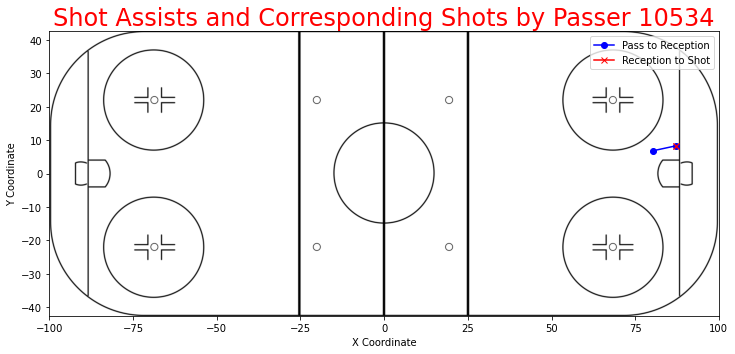

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming merged_data is your DataFrame

# Sort the data by compiledgametime
merged_data = merged_data.sort_values(by='compiledgametime')

# Create a column to flag shots with assists
merged_data['shot_assist'] = False

# Iterate through the DataFrame to flag shot assists
for i in range(2, len(merged_data)):
    # Check if current row is a shot event
    if merged_data.iloc[i]['eventname'] == 'shot' and merged_data.iloc[i]['outcome'] == 'successful':
        # Check if the previous row is a successful reception by a teammate
        if merged_data.iloc[i - 1]['eventname'] == 'reception' and merged_data.iloc[i - 1]['outcome'] == 'successful':
            # Check if the row before the reception is a successful pass by a teammate
            if merged_data.iloc[i - 2]['eventname'] == 'pass' and merged_data.iloc[i - 2]['outcome'] == 'successful':
                # Check if the pass and reception are by teammates
                if merged_data.iloc[i]['teamid'] == merged_data.iloc[i - 1]['teamid'] == merged_data.iloc[i - 2]['teamid']:
                    # Flag the shot event as a shot with an assist
                    merged_data.at[merged_data.index[i], 'shot_assist'] = True

# Filter for shots with assists where the pass was made by playerid 10534
passer_id = 10534
shots_with_assist_by_passer = []
for i in range(2, len(merged_data)):
    if merged_data.iloc[i]['shot_assist'] and merged_data.iloc[i - 2]['playerid'] == passer_id:
        shots_with_assist_by_passer.append((merged_data.iloc[i - 2], merged_data.iloc[i - 1], merged_data.iloc[i]))

# Plot the shot assists and their corresponding shots for the top passer
ax = plot_rink()

first_pass = True
first_shot = True

for pass_event, reception_event, shot_event in shots_with_assist_by_passer:
    # Plot Pass to Reception
    ax.plot([pass_event['xadjcoord'], reception_event['xadjcoord']], 
            [pass_event['yadjcoord'], reception_event['yadjcoord'] * -1], 
            color='blue', marker='o', label='Pass to Reception' if first_pass else "")
    
    # Plot Reception to Shot
    ax.plot([reception_event['xadjcoord'], shot_event['xadjcoord']], 
            [reception_event['yadjcoord'] * -1, shot_event['yadjcoord'] * -1], 
            color='red', marker='x', label='Reception to Shot' if first_shot else "")
    
    first_pass = False
    first_shot = False

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Shot Assists and Corresponding Shots by Passer {passer_id}', fontsize=24, color='red')
plt.legend()
plt.show()


## Q5
### d) For shooters who had more than 1 shot attempt that was assisted, what was the longest average time from their receptions to their shots?
### e) Which playerid had the longest average time answered in d)?

In [120]:
import pandas as pd
from IPython.display import display, Markdown

# Assuming merged_data is your DataFrame and has the 'shot_assist' column from above

# Identify shots that were assisted
assisted_shots = merged_data[merged_data['shot_assist']]

# Initialize a list to store time differences
time_differences = []

# Iterate through the assisted shots
for i in assisted_shots.index:
    # Find the reception event index
    reception_event_index = i - 1
    
    # Ensure indices are within bounds
    if reception_event_index in merged_data.index:
        reception_event = merged_data.loc[reception_event_index]
        shot_event = assisted_shots.loc[i]
        
        # Calculate the time difference between reception and shot
        time_difference = shot_event['compiledgametime'] - reception_event['compiledgametime']
        
        # Append to the list with player ID, time_diff, and other relevant information
        time_differences.append({
            'playerid': shot_event['playerid'],
            'compiledgametime_reception': reception_event['compiledgametime'],
            'compiledgametime_shot': shot_event['compiledgametime'],
            'time_diff': time_difference,
            'teamid': shot_event['teamid']
        })

# Convert to DataFrame
time_diff_df = pd.DataFrame(time_differences)

# Sort by player ID for sanity check
time_diff_df_sorted = time_diff_df.sort_values(by=['playerid', 'compiledgametime_shot'])

# Display the calculated time differences
print("Time Differences from Reception to Shot (Sorted by Player ID)")
print(time_diff_df_sorted)

# Display each player's average time difference for >1 assisted shot
assisted_shot_counts = time_diff_df['playerid'].value_counts()
eligible_shooters = assisted_shot_counts[assisted_shot_counts > 1].index

average_time_per_shooter = time_diff_df[time_diff_df['playerid'].isin(eligible_shooters)].groupby('playerid')['time_diff'].mean()

# Display the average times for each player
print("\nAverage Time from Reception to Shot for Each Shooter with >1 Assisted Shot")
print(average_time_per_shooter.sort_values(ascending=False))

# Find the shooter with the longest average time
longest_avg_time_shooter = average_time_per_shooter.idxmax()
longest_avg_time = average_time_per_shooter.max()

# Display the shooter with the longest average time
display(Markdown(f'<span style="font-size: 20px;">**Shooter with the Longest Average Time from Reception to Shot:** <span style="color: red;">{longest_avg_time_shooter}</span></span>'))
display(Markdown(f'<span style="font-size: 20px;">**Longest Average Time (in seconds):** <span style="color: red;">{longest_avg_time:.2f}</span></span>'))

# Reference the list of assists for that shooter
longest_avg_shooter_shots = time_diff_df_sorted[time_diff_df_sorted['playerid'] == longest_avg_time_shooter]
print(f"\nShots for Player {longest_avg_time_shooter} with Longest Average Time")
print(longest_avg_shooter_shots)


Time Differences from Reception to Shot (Sorted by Player ID)
    playerid  compiledgametime_reception  compiledgametime_shot  time_diff  \
13       884                  1807.16660            1807.733300   0.566700   
1       1462                   109.10000             111.133330   2.033330   
17      6588                  2220.36670            2222.633300   2.266600   
19      6588                  2318.03340            2318.400000   0.366600   
22      6588                  2370.20000            2371.266600   1.066600   
37     78625                  3671.00000            3675.766600   4.766600   
38     78625                  3681.40000            3682.333300   0.933300   
7      79380                   950.83330             952.600000   1.766700   
12     79380                  1674.70000            1676.600000   1.900000   
18     79380                  2267.80000            2268.800000   1.000000   
29     79380                  2775.63330            2777.866700   2.233400   
40

<span style="font-size: 20px;">**Shooter with the Longest Average Time from Reception to Shot:** <span style="color: red;">112050</span></span>

<span style="font-size: 20px;">**Longest Average Time (in seconds):** <span style="color: red;">3.27</span></span>


Shots for Player 112050 with Longest Average Time
    playerid  compiledgametime_reception  compiledgametime_shot  time_diff  \
4     112050                    734.4667               741.0333     6.5666   
20    112050                   2320.3333              2323.4000     3.0667   
34    112050                   3435.7334              3435.9000     0.1666   

    teamid  
4      311  
20     311  
34     311  


## Q6)
### a) Which teamid won the all strengths xG battle?
### b) What was the losing team's all strengths xG? (round to X.XX)

In [125]:
import pandas as pd

# Filter for rows where eventname is 'shot'
shots_data = merged_data[merged_data['eventname'] == 'shot']

# Group by teamid
grouped_by_team = shots_data.groupby('teamid')

# Calculate the sum of xG for each team
xg_per_team = grouped_by_team['xg'].sum()

# Count the number of shots taken by each team
shots_count_per_team = grouped_by_team.size()

# Display the results
for team_id in xg_per_team.index:
    print(f"Team ID: {team_id}")
    print(f"xG: {xg_per_team[team_id]:.2f}")
    print(f"Number of Shots: {shots_count_per_team[team_id]}")
    print()

# Step 5: Determine the team with the highest xG value
winning_team = xg_per_team.idxmax()
winning_xg = xg_per_team.max()

print(f"The team that won the xG battle is Team {winning_team} with an xG of {winning_xg:.2f}")

# Display the xG values and number of shots for all teams
print("\nTeam xG Values and Shot Counts:")
team_xg_shots_df = pd.DataFrame({'xG': xg_per_team, 'Shots': shots_count_per_team})
print(team_xg_shots_df.to_string(float_format="{:.2f}".format))


Team ID: 311
xG: 3.67
Number of Shots: 62

Team ID: 315
xG: 2.68
Number of Shots: 61

The team that won the xG battle is Team 311 with an xG of 3.67

Team xG Values and Shot Counts:
         xG  Shots
teamid            
311    3.67     62
315    2.68     61


## Q7) 
### a) With the information provided in the data files and the columns you've been asked to create in the questions above, use a statistical technique of your choice to show the highest predictors of a goal within this dataset (what would use if you were building an xG model).

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Feature Engineering
# Calculate distance and angle to the net
merged_data['distance_to_net'] = np.sqrt((merged_data['xadjcoord'] - 89)**2 + merged_data['yadjcoord']**2)
merged_data['angle_to_net'] = np.arctan2(merged_data['yadjcoord'], merged_data['xadjcoord'] - 89) * (180 / np.pi)

# Create new features
features = [
    'xg', 
    'shot_assist', 
    'distance_to_net', 
    'angle_to_net', 
    'compiledgametime', 
    'zone', 
    'outcome', 
    'playsection', 
    'eventname', 
    'teamid', 
    'playerid'
]
target = 'goal'

# Filter the DataFrame to only include relevant features and target
data = merged_data[features + [target]].copy()

# Handle missing values
data.fillna(0, inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['outcome', 'zone', 'playsection', 'eventname', 'teamid', 'playerid'])

# Split the data into features (X) and target (y)
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Get model predictions
y_pred = model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Get the model coefficients
coefficients = model.coef_[0]
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the most significant predictors
print("\nMost Significant Predictors of a Goal:")
print(feature_importance.head(10))

# Creating a list of features sorted by their coefficients (importance)
predictors_sorted = feature_importance['Feature'].tolist()

# Display the sorted list of predictors
print("\nPredictors Sorted by Importance:")
print(predictors_sorted)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       538
           1       0.00      0.00      0.00         2

    accuracy                           0.99       540
   macro avg       0.50      0.50      0.50       540
weighted avg       0.99      0.99      0.99       540


Most Significant Predictors of a Goal:
                         Feature  Coefficient
1                    shot_assist     0.869611
50                playerid_79380     0.623526
10       playsection_centerPoint     0.547241
0                             xg     0.542018
58               playerid_109964     0.538556
23  playsection_outsideNorthWest     0.507696
34                eventname_shot     0.390919
69               playerid_370192     0.287271
53                playerid_81408     0.222135
36                    teamid_315     0.185066

Predictors Sorted by Importance:
['shot_assist', 'playerid_79380', 'playsection_centerPoint', 'xg', 'playerid_109964', 'playse

### b) Please explain your reasoning for your choices in answering 7a) and then explain your findings like you were talking to the Assistant Coach.

Coach, 
Based on this game, the three most import factors leading to goals were: completed passes to a high danger area (pass to slot), shots from high danger area (centerPoint), when player 79380 or 109964 shot the puck.

It's only one game, but if it represents what your stuff also saw, then that gives our data team confidence to use the model we built to provide your guys with information.

Based on your post game video analysis, did you and your staff feel that shots from the centerPoint and uncontested passes to dangerzones led to the most dagnerous scoring chances for both teams. Additionally, did you feel players 79380 and 109964 had the most scoring chances?

If so, our models align with what your staff saw, and are prediciting goals well. We can build them out and come back with more robust metrics that should predict goals. 

Since these metrics (where passes come from and go to, where shots come from, and who shoots the puck) are the best predictors of goals. We can provide you with a simple report for your prescout, and a postgame breakdown, with those goal preidcitng metrics, which should help your team in preparing for and breaking down games.
